In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# img = cv2.imread("/home/hero576/Pictures/night_lane.png")
img = cv2.imread("/home/hero576/Pictures/2.jpeg")

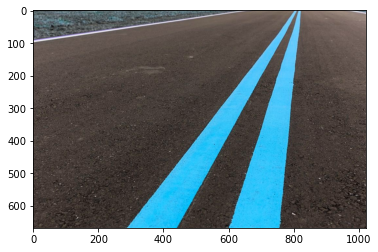

In [80]:
plt.imshow(img)

In [92]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (9, 9), 0)
hist_auto = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
clahe = hist_auto.apply(blur)
edge = cv2.Canny(clahe, 50, 150)
lines = cv2.HoughLinesP(edge,1,np.pi / 180,40,np.array([]),minLineLength=60,maxLineGap=30)             

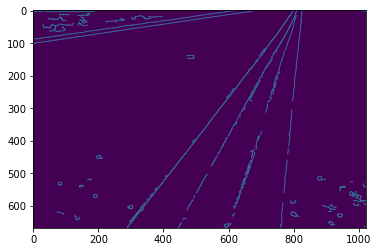

In [93]:
plt.imshow(edge)

In [94]:
lines.shape

(44, 1, 4)

In [98]:
lines[:2]

array([[[292, 664, 717, 119]],

       [[  4,  88, 626,   1]]], dtype=int32)

In [99]:
lines_reshape = lines.reshape((lines.shape[0], lines.shape[2]))

In [101]:
lines_reshape[:2]

array([[292, 664, 717, 119],
       [  4,  88, 626,   1]], dtype=int32)

In [109]:
lines_reshape2 = lines.reshape((lines.shape[0] * 2, lines.shape[2] // 2))[:,1]

In [110]:
lines_reshape2.shape

(88,)

In [111]:
lines_reshape2

array([664, 119,  88,   1, 613, 129,  60,  18, 460, 119, 273,   0, 352,
        42, 667, 336,  25,   2, 309, 121, 514, 387, 554, 365, 101,  60,
       647, 566,   4,   4,  29,   5, 647, 545, 590, 428, 580, 443, 599,
       474, 609, 433, 378, 311, 177,  96,  92,   2, 272, 191, 613, 113,
       314, 159, 181,  54, 308,  84, 101,  86,  35,  20, 535, 443, 598,
       385,  85,   4,   5,   5, 344, 121,  44,  47, 607, 521,  73,  35,
       660, 591,  49,  38, 281, 214,  34,  19, 353, 219], dtype=int32)

In [95]:
img_lines = np.zeros_like(img)
if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            if ((y1-y2)**2+(x1-x2)**2)**0.5<100:
                continue
            cv2.line(img_lines, (x1, y1), (x2, y2), [255,0,255], 3)

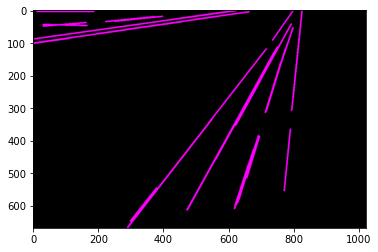

In [96]:
plt.imshow(img_lines)

In [18]:
len(lines)

732

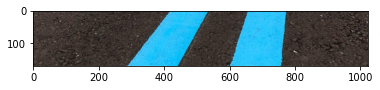

In [117]:
plt.imshow(img[500:,:])

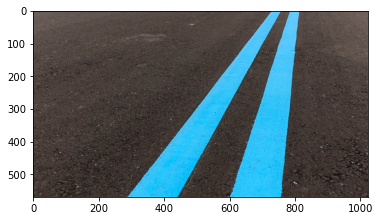

In [114]:
plt.imshow(img[100:,:])

In [153]:
lines = cv2.HoughLinesP(edge, 1, np.pi/180, 40, np.array([]), minLineLength=60, maxLineGap=30)
lines.shape

(44, 1, 4)

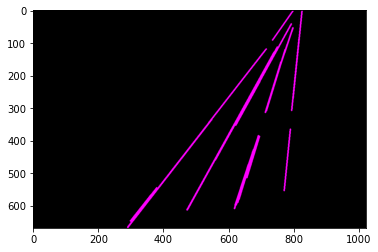

In [156]:
img_lines = np.zeros_like(img)
if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            if ((y1-y2)**2+(x1-x2)**2)**0.5<100:
                continue
            theta = np.abs(np.arctan2((y2-y1), (x2-x1)))
            if theta<0.3:
                continue
            cv2.line(img_lines, (x1, y1), (x2, y2), [255,0,255], 3)
plt.imshow(img_lines)

In [143]:
line_params = cv2.HoughLines(edge, 1, np.pi/180, 50)
lines = []
for l in line_params:
    for rho, theta in l:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*a)
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*a)
        lines.append((x1, y1, x2, y2))
lines = np.array(lines)

In [146]:
lines.shape

(109, 4)

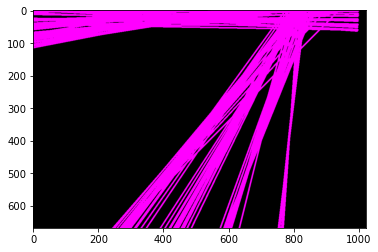

In [149]:
img_lines = np.zeros_like(img)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line
        if ((y1-y2)**2+(x1-x2)**2)**0.5<100:
            continue
        cv2.line(img_lines, (x1, y1), (x2, y2), [255,0,255], 3)
plt.imshow(img_lines)

In [155]:
lines[:1]

array([[[292, 664, 717, 119]]], dtype=int32)

In [154]:
lines + np.array([0, 100, 0, 100]).reshape((1, 1, 4))

array([[[292, 764, 717, 219]],

       [[  4, 188, 626, 101]],

       [[473, 713, 741, 229]],

       [[281, 160, 574, 118]],

       [[560, 560, 749, 219]],

       [[799, 373, 827, 100]],

       [[623, 452, 794, 142]],

       [[291, 767, 549, 436]],

       [[451, 125, 614, 102]],

       [[717, 409, 775, 221]],

       [[657, 614, 696, 487]],

       [[772, 654, 791, 465]],

       [[  0, 201, 287, 160]],

       [[299, 747, 363, 666]],

       [[ 11, 104, 187, 104]],

       [[493, 129, 664, 105]],

       [[300, 747, 380, 645]],

       [[629, 690, 678, 528]],

       [[633, 680, 675, 543]],

       [[621, 699, 662, 574]],

       [[619, 709, 676, 533]],

       [[788, 478, 795, 411]],

       [[718, 277, 763, 196]],

       [[736, 192, 799, 102]],

       [[732, 372, 757, 291]],

       [[474, 713, 751, 213]],

       [[714, 414, 762, 259]],

       [[756, 281, 799, 154]],

       [[795, 408, 818, 184]],

       [[  6, 201, 112, 186]],

       [[223, 135, 373, 120]],

       [